# Raster Tools

In [1]:
import xarray as xr
import numpy as np
import rasterio
import geopandas as gpd
import rioxarray
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from rastertools import *

warnings.filterwarnings("ignore")

In [2]:
class RiverDataset:
    def __init__(self, root_dir: str):
        self.root_dir = root_dir
        self.input_dir = root_dir + "/input"
        self.output_dir = root_dir + "/output"
        self.mesh_file = self.input_dir + "/mesh_points.geojson"
        self.boundary_file = self.input_dir + "/boundary.geojson"
        self.dem_file = self.input_dir + "/dem_clip.tif"
        self.surface_file = self.output_dir + "/surface.tif"
        self.merged_file = self.output_dir + "/merged.tif"

brazos = RiverDataset(root_dir="./data/brazos")
mississippi = RiverDataset(root_dir="./data/mississippi")
wabash = RiverDataset(root_dir="./data/wabash")
rivers = [brazos, mississippi, wabash]

### Convert features (points) to mesh


In [3]:
for river in rivers:
    interpolate_points_to_raster(mesh_file=river.mesh_file, 
                                surface_file=river.surface_file, 
                                boundary_file=river.boundary_file, 
                                resolution=5)

### Integrate bathymetry surface with DEM

In [4]:
for river in rivers:
    value_type = 'depth-' if ('brazos' in river.root_dir) else 'depth+'
    integrate_surface_with_dem(surface_file=river.surface_file,
                                dem_file=river.dem_file,
                                merged_file=river.merged_file, 
                                value_type=value_type, 
                                resolution=5)

### Illustrated resutls

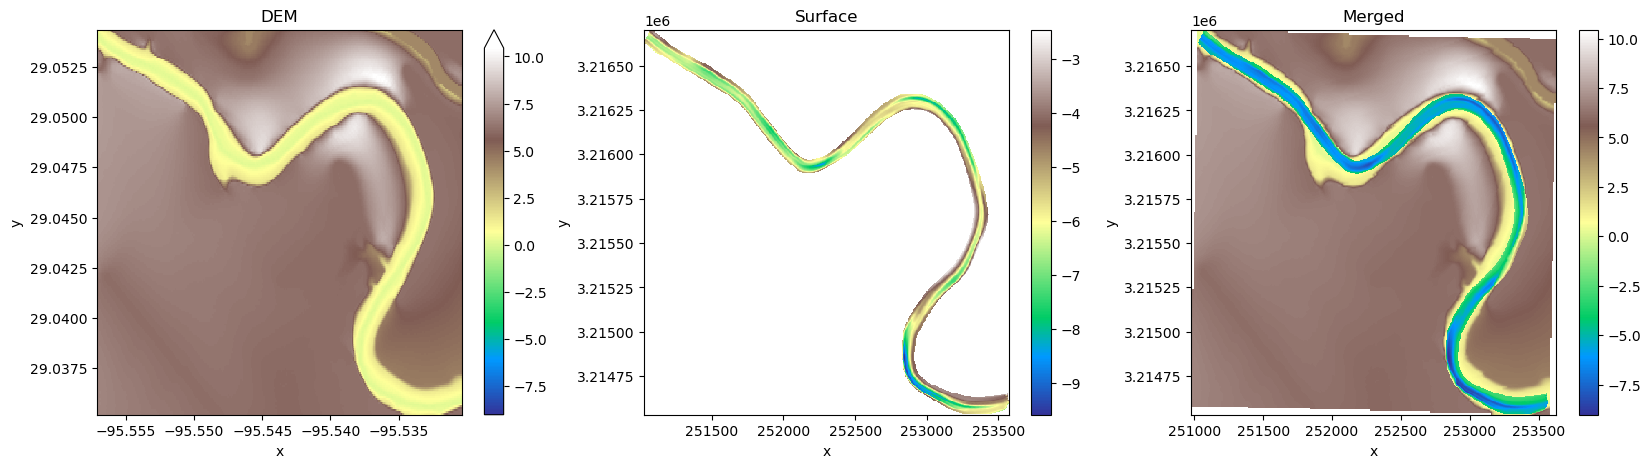

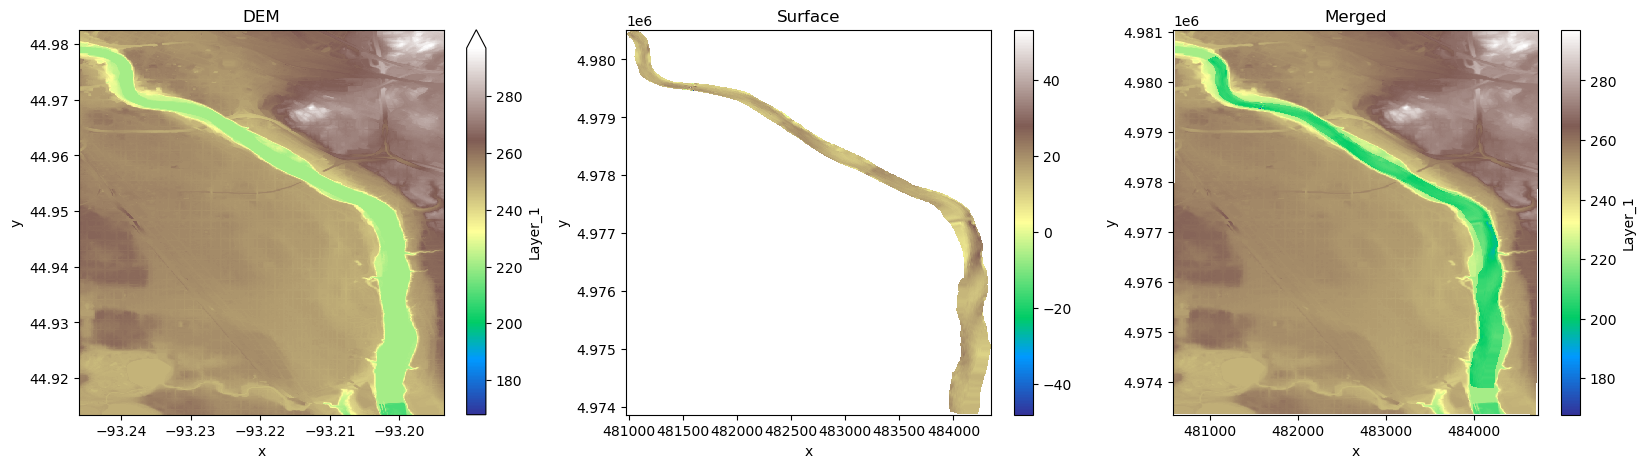

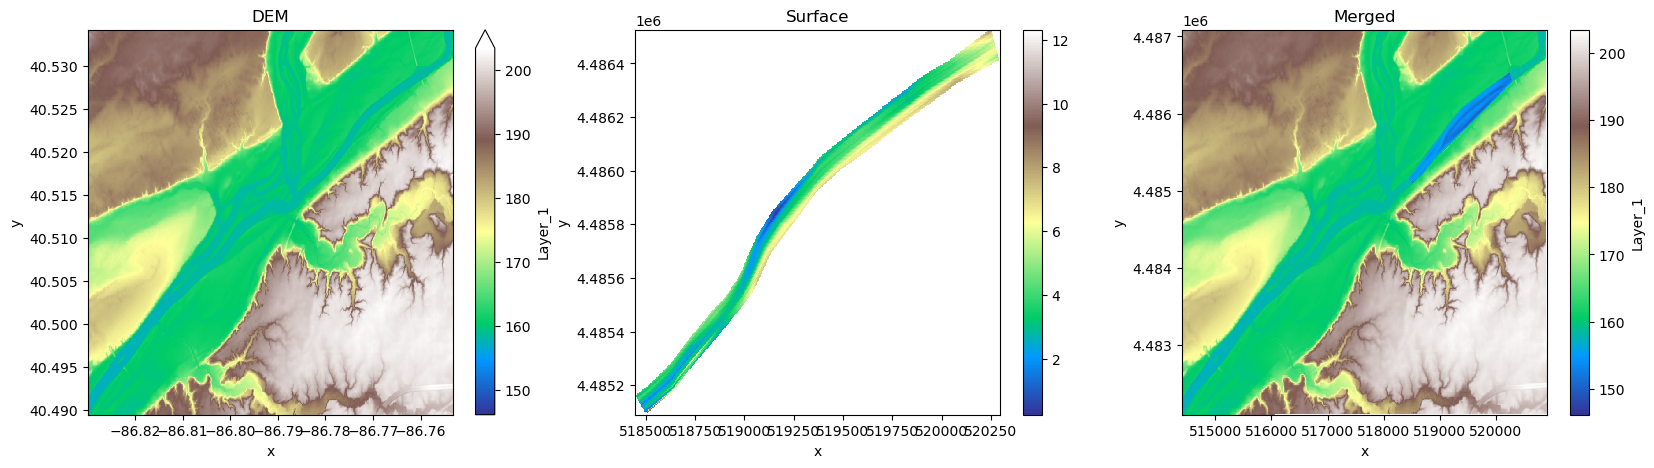

In [5]:
for river in rivers:
    dem_raster = rioxarray.open_rasterio(river.dem_file)
    surface_raster = rioxarray.open_rasterio(river.surface_file)
    merged_raster = rioxarray.open_rasterio(river.merged_file)

    vmin, vmax = merged_raster.min(), merged_raster.max()
    bmin, bmax = surface_raster.min(), surface_raster.max()

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
    dem_raster.plot(ax=axes[0], cmap="terrain", vmin=vmin, vmax=vmax)
    axes[0].set_title("DEM")
    surface_raster.plot(ax=axes[1], cmap="terrain", vmin=bmin, vmax=bmax)
    axes[1].set_title("Surface")
    merged_raster.plot(ax=axes[2], cmap="terrain", vmin=vmin, vmax=vmax)
    axes[2].set_title("Merged")
    plt.show()
    plt.close()